## Variables Ficticas

File: Publicidad_ventas_ABC.xlsx

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import statsmodels.formula.api as smf


In [2]:
df = pd.read_excel('../MyPython/dataset/Publicidad_ventas_ABC.xlsx')
df = df.drop(['ID'], axis=1)
print(df.shape)
df.head()

(45, 3)


,Publicidad,Ventas,Sede
0,75.72,1245.30,A
1,122.91,1482.49,A
2,209.64,1656.05,A
3,249.79,1482.49,A
4,181.63,1413.07,A


In [3]:
df.Sede.value_counts()

Sede
A    15
B    15
C    15
Name: count, dtype: int64

`¿Cuál es el modelo que me permite estimar las ventas que voy a alcanzar en función de la publicidad que realizado? `

Text(0, 0.5, 'Ventas')

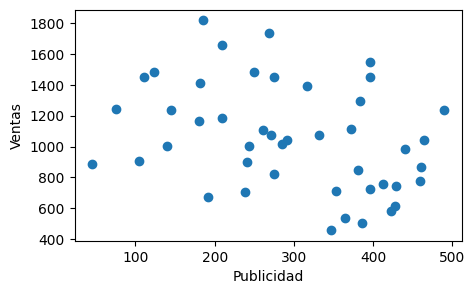

In [4]:
plt.figure(figsize=(5, 3))
plt.scatter(df['Publicidad'], df['Ventas']);
plt.xlabel('Publicidad')
plt.ylabel('Ventas')

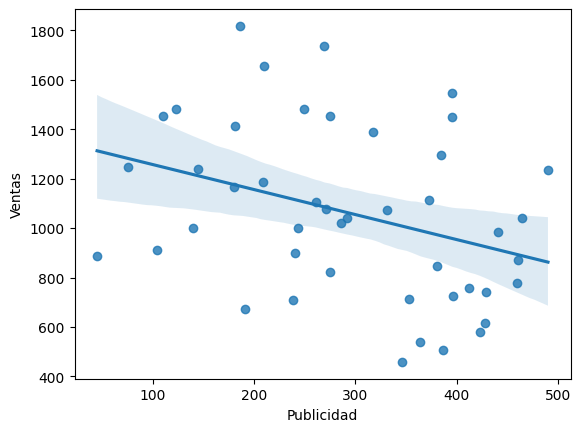

In [5]:
sns.regplot(x='Publicidad', y='Ventas', data=df);

In [6]:
# Calcular la correlación 
df.corr(numeric_only=True)

,Publicidad,Ventas
Publicidad,1.000000,-0.347235
Ventas,-0.347235,1.000000


In [7]:
x = df[['Publicidad']]
y = df[['Ventas']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

rl = LinearRegression()
rl.fit(X_train, y_train)
print(rl.score(X_train, y_train))
print(rl.intercept_)
print(rl.coef_)

0.1623562224599977
[1411.73598725]
[[-1.25467245]]


$$ Ventas = 1411 - 1.25 * Publicidad$$
$$R^2 = 0.16$$

# se pierde un 1.25 por cada unidad (dólar) que se invierte en publicidad

Consideremos la variable `SEDE`

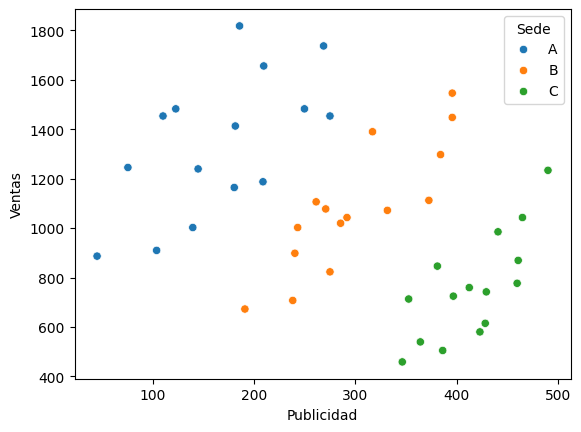

In [8]:
sns.scatterplot(x='Publicidad', y='Ventas', hue='Sede', data=df);
# los puntos se clasifican en colores y los colores son la sede

Calcular la correlación por SEDE

In [9]:
print(f"Correlación SEDE ABC: {df.corr(numeric_only=True).iloc[0, 1]:.2f}")
print(f"Correlación SEDE ABC: {df[df['Sede'] == 'A'].corr(numeric_only=True).iloc[0, 1]:.2f}")
print(f"Correlación SEDE ABC: {df[df['Sede'] == 'B'].corr(numeric_only=True).iloc[0, 1]:.2f}")
print(f"Correlación SEDE ABC: {df[df['Sede'] == 'C'].corr(numeric_only=True).iloc[0, 1]:.2f}")

# Considerar la correlación por sede
# for sede in df['Sede'].unique():
#     df_sede = df[df['Sede'] == sede]
#     corr = df_sede.corr(numeric_only=True).iloc[0, 1]
#     print(f"Correlación SEDE {sede}: {corr:.2f}")

Correlación SEDE ABC: -0.35
Correlación SEDE ABC: 0.61
Correlación SEDE ABC: 0.85
Correlación SEDE ABC: 0.75


In [10]:
df = pd.get_dummies(df) #, columns=['Sede'], drop_first=True)
df.head()

,Publicidad,Ventas,Sede_A,Sede_B,Sede_C
0,75.72,1245.30,True,False,False
1,122.91,1482.49,True,False,False
2,209.64,1656.05,True,False,False
3,249.79,1482.49,True,False,False
4,181.63,1413.07,True,False,False


Ecuación de ejemplo: 
$$ Ventas = 345 + 34 * Publicidad - 3 * Sede_A + 4 * Sede_B - 1 * Sede_C$$

In [11]:
X = df.drop(columns='Ventas')
y = df['Ventas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rl = LinearRegression()
rl.fit(X_train, y_train)

print(rl.score(X_train, y_train))
print(rl.intercept_)
print(rl.coef_)


# coeficientes = pd.DataFrame({
#     'Variable': ['Intercepto'] + list(X.columns),
#     'Coeficiente': [rl.intercept_] + list(rl.coef_)
# })
# display(coeficientes)

0.7873347386868179
221.38661115421814
[   2.8543927   686.77394031  -16.43986    -670.33408031]


$$ Ventas = 221.38661115421814 + 2.8543927 * Publicidad + 686.77394031 * Sede_A - 16.43986 * Sede_B - 670.33408031 * Sede_C$$

In [20]:
import statsmodels.formula.api as smf
import pandas as pd

df_original = pd.read_excel('../MyPython/dataset/Publicidad_ventas_ABC.xlsx')
df_original = df_original.drop(['ID'], axis=1, errors='ignore') 

modelo_correcto = smf.ols(
    formula='Ventas ~ Publicidad + C(Sede)',
    data=df_original
).fit()

print(modelo_correcto.summary())

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     42.36
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           1.25e-12
Time:                        09:25:13   Log-Likelihood:                -294.58
No. Observations:                  45   AIC:                             597.2
Df Residuals:                      41   BIC:                             604.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      832.9223     88.472      9.415   

$$ \text{Ventas} = 3.05 \times \text{Publicidad} - 666.01 \times \text{Sede B} - 1341.87 \times \text{Sede C} $$